In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('/Users/rohanwaghmare/Downloads/Pune house data.csv')

In [3]:
df.head()

,area_type,availability,size,society,total_sqft,bath,balcony,price,site_location
0,Super built-up Area,19-Dec,2 BHK,Coomee,1056,2.0,1.0,39.07,Alandi Road
1,Plot Area,Ready To Move,4 Bedroom,Theanmp,2600,5.0,3.0,120.00,Ambegaon Budruk
2,Built-up Area,Ready To Move,3 BHK,NaN,1440,2.0,3.0,62.00,Anandnagar
3,Super built-up Area,Ready To Move,3 BHK,Soiewre,1521,3.0,1.0,95.00,Aundh
4,Super built-up Area,Ready To Move,2 BHK,NaN,1200,2.0,1.0,51.00,Aundh Road


In [4]:
df.shape

(13320, 9)

In [5]:
df.groupby('area_type')['area_type'].agg('count')

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

In [6]:
df.describe

<bound method NDFrame.describe of                   area_type   availability       size  society total_sqft  \
0      Super built-up  Area         19-Dec      2 BHK  Coomee        1056   
1                Plot  Area  Ready To Move  4 Bedroom  Theanmp       2600   
2            Built-up  Area  Ready To Move      3 BHK      NaN       1440   
3      Super built-up  Area  Ready To Move      3 BHK  Soiewre       1521   
4      Super built-up  Area  Ready To Move      2 BHK      NaN       1200   
...                     ...            ...        ...      ...        ...   
13315        Built-up  Area  Ready To Move  5 Bedroom  ArsiaEx       3453   
13316  Super built-up  Area  Ready To Move      4 BHK      NaN       3600   
13317        Built-up  Area  Ready To Move      2 BHK  Mahla T       1141   
13318  Super built-up  Area         18-Jun      4 BHK  SollyCl       4689   
13319  Super built-up  Area  Ready To Move      1 BHK      NaN        550   

       bath  balcony   price         site

In [7]:
df.isnull().sum()

area_type           0
availability        0
size               16
society          5502
total_sqft          0
bath               73
balcony           609
price               0
site_location       1
dtype: int64

In [8]:
df1 = df.drop(['area_type','society','balcony','availability'],axis=1)

In [9]:
df1.head()

,size,total_sqft,bath,price,site_location
0,2 BHK,1056,2.0,39.07,Alandi Road
1,4 Bedroom,2600,5.0,120.00,Ambegaon Budruk
2,3 BHK,1440,2.0,62.00,Anandnagar
3,3 BHK,1521,3.0,95.00,Aundh
4,2 BHK,1200,2.0,51.00,Aundh Road


In [10]:
df1.isnull().sum()

size             16
total_sqft        0
bath             73
price             0
site_location     1
dtype: int64

In [11]:
df2 = df1.dropna()
df2.isnull().sum()

size             0
total_sqft       0
bath             0
price            0
site_location    0
dtype: int64

In [12]:
df2['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [13]:
df2['BHK'] = df2['size'].apply(lambda x: int(x.split(' ')[0]))
df2.head()

/var/folders/w5/3mw7705900gg08mstph9k9800000gn/T/ipykernel_63853/2137667413.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['BHK'] = df2['size'].apply(lambda x: int(x.split(' ')[0]))


,size,total_sqft,bath,price,site_location,BHK
0,2 BHK,1056,2.0,39.07,Alandi Road,2
1,4 Bedroom,2600,5.0,120.00,Ambegaon Budruk,4
2,3 BHK,1440,2.0,62.00,Anandnagar,3
3,3 BHK,1521,3.0,95.00,Aundh,3
4,2 BHK,1200,2.0,51.00,Aundh Road,2


In [14]:
df3 = df2.drop(['size'],axis=1)
df3

,total_sqft,bath,price,site_location,BHK
0,1056,2.0,39.07,Alandi Road,2
1,2600,5.0,120.00,Ambegaon Budruk,4
2,1440,2.0,62.00,Anandnagar,3
3,1521,3.0,95.00,Aundh,3
4,1200,2.0,51.00,Aundh Road,2
...,...,...,...,...,...
13315,3453,4.0,231.00,Pashan,5
13316,3600,5.0,400.00,Paud Road,4
13317,1141,2.0,60.00,Pirangut,2
13318,4689,4.0,488.00,Prabhat Road,4


In [15]:
df3['BHK'].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18])

In [16]:
df3[df3.BHK>20]

,total_sqft,bath,price,site_location,BHK
1718,8000,27.0,230.0,Uruli Devachi,27
4684,2400,40.0,660.0,Salunke Vihar,43


In [17]:
df3['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [18]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [19]:
df3[~df3['total_sqft'].apply(is_float)].head(10)

,total_sqft,bath,price,site_location,BHK
30,2100 - 2850,4.0,186.000,Gultekdi,4
122,3067 - 8156,4.0,477.000,Ganeshkhind,4
137,1042 - 1105,2.0,54.005,Khadaki,2
165,1145 - 1340,2.0,43.490,Prabhat Road,2
188,1015 - 1540,2.0,56.800,Wakadewadi,2
410,34.46Sq. Meter,1.0,18.500,Ganeshkhind,1
549,1195 - 1440,2.0,63.770,Prabhat Road,2
648,4125Perch,9.0,265.000,Raviwar Peth,9
661,1120 - 1145,2.0,48.130,Tilak Road,2
672,3090 - 5002,4.0,445.000,Alandi Road,4


In [20]:
def convert_sqft_to_num(x):
    tokens=x.split('-')
    if len(tokens)==2:
        return (float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None

In [21]:
convert_sqft_to_num('2100 - 2850')

2475.0

In [22]:
convert_sqft_to_num('34.46Sq. Meter')

In [23]:
df4=df3.copy()
df4['total_sqft']=df4['total_sqft'].apply(convert_sqft_to_num)

In [24]:
df4.loc[648]

total_sqft                NaN
bath                      9.0
price                   265.0
site_location    Raviwar Peth
BHK                         9
Name: 648, dtype: object

In [25]:
df4.isnull().sum()

total_sqft       46
bath              0
price             0
site_location     0
BHK               0
dtype: int64

In [26]:
df5=df4.dropna()

In [27]:
df5.isnull().sum()

total_sqft       0
bath             0
price            0
site_location    0
BHK              0
dtype: int64

In [28]:
df5['price_per_sqft'] = df5['price']*100000/df5['total_sqft']
df5.head()

/var/folders/w5/3mw7705900gg08mstph9k9800000gn/T/ipykernel_63853/2223778662.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df5['price_per_sqft'] = df5['price']*100000/df5['total_sqft']


,total_sqft,bath,price,site_location,BHK,price_per_sqft
0,1056.0,2.0,39.07,Alandi Road,2,3699.810606
1,2600.0,5.0,120.00,Ambegaon Budruk,4,4615.384615
2,1440.0,2.0,62.00,Anandnagar,3,4305.555556
3,1521.0,3.0,95.00,Aundh,3,6245.890861
4,1200.0,2.0,51.00,Aundh Road,2,4250.000000


In [29]:
df5

,total_sqft,bath,price,site_location,BHK,price_per_sqft
0,1056.0,2.0,39.07,Alandi Road,2,3699.810606
1,2600.0,5.0,120.00,Ambegaon Budruk,4,4615.384615
2,1440.0,2.0,62.00,Anandnagar,3,4305.555556
3,1521.0,3.0,95.00,Aundh,3,6245.890861
4,1200.0,2.0,51.00,Aundh Road,2,4250.000000
...,...,...,...,...,...,...
13315,3453.0,4.0,231.00,Pashan,5,6689.834926
13316,3600.0,5.0,400.00,Paud Road,4,11111.111111
13317,1141.0,2.0,60.00,Pirangut,2,5258.545136
13318,4689.0,4.0,488.00,Prabhat Road,4,10407.336319


In [30]:
len(df5['site_location'].unique())

97

In [31]:
df5.location=df5.site_location.apply(lambda x:x.strip())
location_stats=df5.groupby('site_location')['site_location'].agg('count').sort_values(ascending=False)
location_stats

/var/folders/w5/3mw7705900gg08mstph9k9800000gn/T/ipykernel_63853/553670192.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df5.location=df5.site_location.apply(lambda x:x.strip())


site_location
Kasba Peth         139
Bibvewadi          139
Mangalwar peth     139
Ambegaon Budruk    139
Gokhale Nagar      139
                  ... 
Model colony       135
Fatima Nagar       135
Wakadewadi         134
Vadgaon Budruk     133
other                1
Name: site_location, Length: 97, dtype: int64

In [32]:
len(location_stats[location_stats<=10])

1

In [33]:
locstats_less_than_10 = location_stats[location_stats<=10]
locstats_less_than_10

site_location
other    1
Name: site_location, dtype: int64

In [34]:
df5.site_location = df5.site_location.apply(lambda x: 'other' if x in locstats_less_than_10 else x)

/var/folders/w5/3mw7705900gg08mstph9k9800000gn/T/ipykernel_63853/191410425.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df5.site_location = df5.site_location.apply(lambda x: 'other' if x in locstats_less_than_10 else x)


In [35]:
len(df5.site_location.unique())

97

In [36]:
df5

,total_sqft,bath,price,site_location,BHK,price_per_sqft
0,1056.0,2.0,39.07,Alandi Road,2,3699.810606
1,2600.0,5.0,120.00,Ambegaon Budruk,4,4615.384615
2,1440.0,2.0,62.00,Anandnagar,3,4305.555556
3,1521.0,3.0,95.00,Aundh,3,6245.890861
4,1200.0,2.0,51.00,Aundh Road,2,4250.000000
...,...,...,...,...,...,...
13315,3453.0,4.0,231.00,Pashan,5,6689.834926
13316,3600.0,5.0,400.00,Paud Road,4,11111.111111
13317,1141.0,2.0,60.00,Pirangut,2,5258.545136
13318,4689.0,4.0,488.00,Prabhat Road,4,10407.336319


In [37]:
df5[df5['total_sqft']/df5['BHK']<300].head()

,total_sqft,bath,price,site_location,BHK,price_per_sqft
9,1020.0,6.0,370.0,Bhavani Peth,6,36274.509804
45,600.0,9.0,200.0,Kondhwa Budruk,8,33333.333333
58,1407.0,4.0,150.0,Mundhawa,6,10660.980810
68,1350.0,7.0,85.0,Pirangut,8,6296.296296
70,500.0,3.0,100.0,Pune Railway Station,3,20000.000000


In [38]:
len(df5[df5['total_sqft']/df5['BHK']<300])

744

In [39]:
df6 = df5[~(df5['total_sqft']/df5['BHK']<300)]
df6.shape

(12456, 6)

In [40]:
df6['price_per_sqft'].describe()


count     12456.000000
mean       6308.628922
std        4168.075333
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

In [41]:
def remove_pps_outliers(df):
    df_out=pd.DataFrame()
    for key,subdf in df.groupby('site_location'):
        m=np.mean(subdf.price_per_sqft)
        st=np.std(subdf.price_per_sqft)
        reduced_df=subdf[(subdf.price_per_sqft>(m-st))&(subdf.price_per_sqft<=(m+st))]
        df_out=pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out

df7=remove_pps_outliers(df6)

In [42]:
df7.shape

(10883, 6)

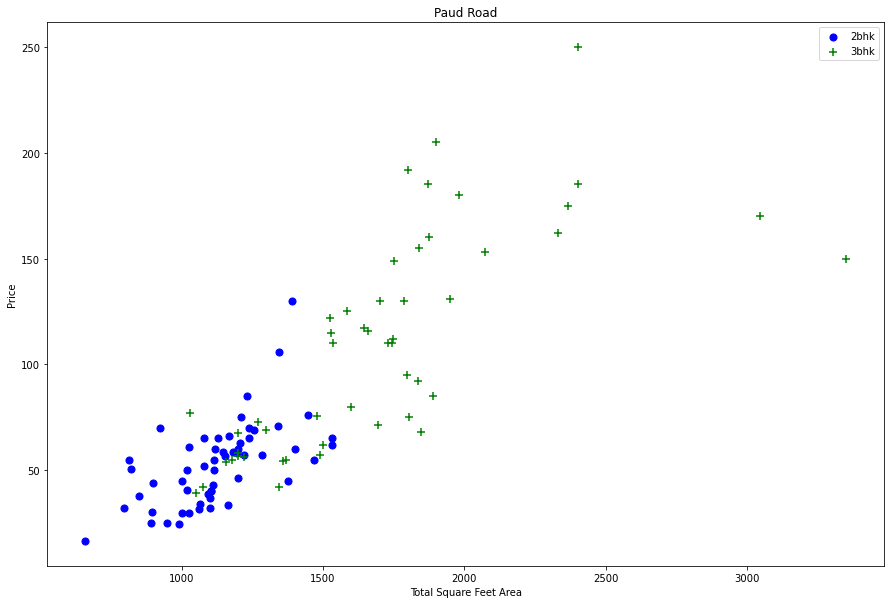

In [43]:
import matplotlib.pyplot as plt

def plot_scatter_chart(df,location):
    bhk2 = df[(df.site_location==location)&(df.BHK==2)]
    bhk3 = df[(df.site_location==location)&(df.BHK==3)]
    plt.rcParams['figure.figsize']=(15,10)
    plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label='2bhk',s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,marker='+',color='green',label='3bhk',s=50)
    plt.xlabel('Total Square Feet Area')
    plt.ylabel('Price')
    plt.title(location)
    plt.legend()
    
plot_scatter_chart(df7,'Paud Road')

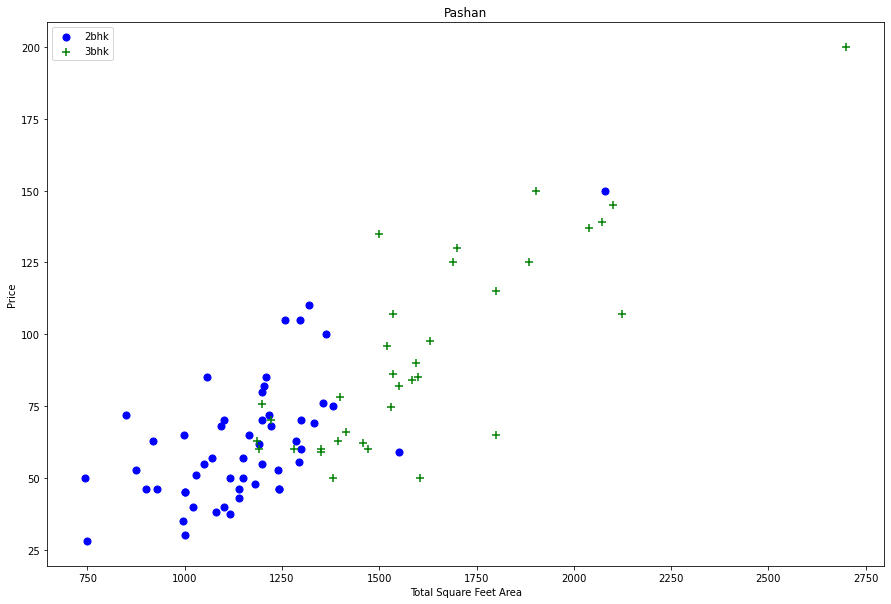

In [44]:
import matplotlib.pyplot as plt

def plot_scatter_chart(df,location):
    bhk2 = df[(df.site_location==location)&(df.BHK==2)]
    bhk3 = df[(df.site_location==location)&(df.BHK==3)]
    plt.rcParams['figure.figsize']=(15,10)
    plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label='2bhk',s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,marker='+',color='green',label='3bhk',s=50)
    plt.xlabel('Total Square Feet Area')
    plt.ylabel('Price')
    plt.title(location)
    plt.legend()
    
plot_scatter_chart(df7,'Pashan')

In [45]:
def remove_bhk_outliers(df):
    exclude_indices=np.array([])
    for location, location_df in df.groupby('site_location'):
        bhk_stats={}
        for bhk,bhk_df in location_df.groupby('BHK'):
            bhk_stats[bhk]={
                'mean':np.mean(bhk_df.price_per_sqft),
                'std':np.std(bhk_df.price_per_sqft),
                'count':bhk_df.shape[0]
            }
        for bhk,bhk_df in location_df.groupby('BHK'):
            stats=bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices=np.append(exclude_indices,bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')

df8 = remove_bhk_outliers(df7)

In [46]:
df8.shape

(7543, 6)

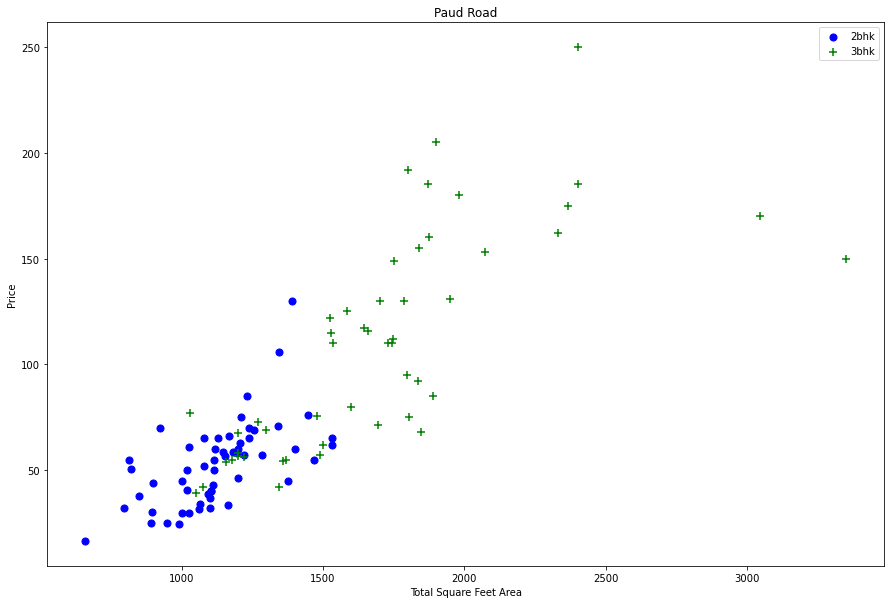

In [47]:
import matplotlib.pyplot as plt

def plot_scatter_chart(df,location):
    bhk2 = df[(df.site_location==location)&(df.BHK==2)]
    bhk3 = df[(df.site_location==location)&(df.BHK==3)]
    plt.rcParams['figure.figsize']=(15,10)
    plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label='2bhk',s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,marker='+',color='green',label='3bhk',s=50)
    plt.xlabel('Total Square Feet Area')
    plt.ylabel('Price')
    plt.title(location)
    plt.legend()
    
plot_scatter_chart(df7,'Paud Road')

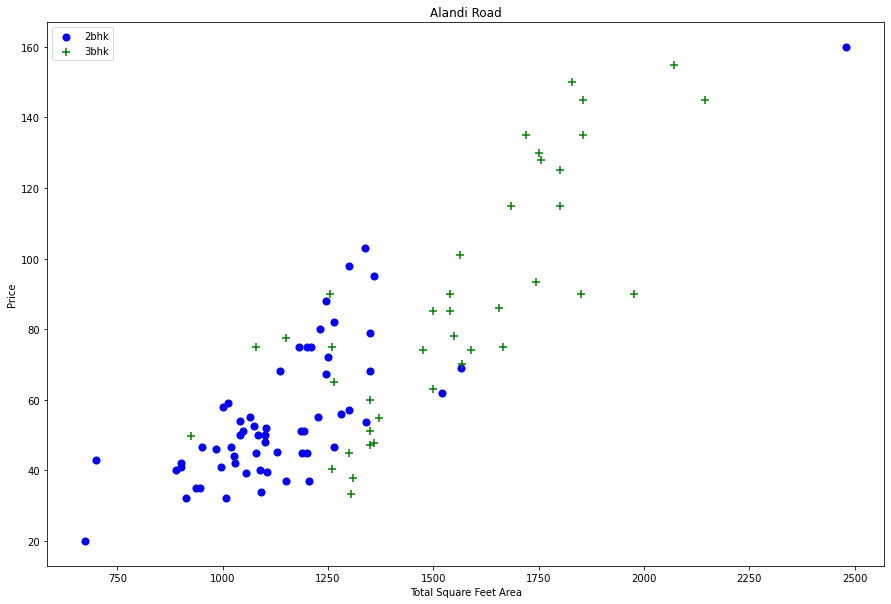

In [48]:
import matplotlib.pyplot as plt

def plot_scatter_chart(df,location):
    bhk2 = df[(df.site_location==location)&(df.BHK==2)]
    bhk3 = df[(df.site_location==location)&(df.BHK==3)]
    plt.rcParams['figure.figsize']=(15,10)
    plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label='2bhk',s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,marker='+',color='green',label='3bhk',s=50)
    plt.xlabel('Total Square Feet Area')
    plt.ylabel('Price')
    plt.title(location)
    plt.legend()
    
plot_scatter_chart(df7,'Alandi Road')

Text(0, 0.5, 'Count')

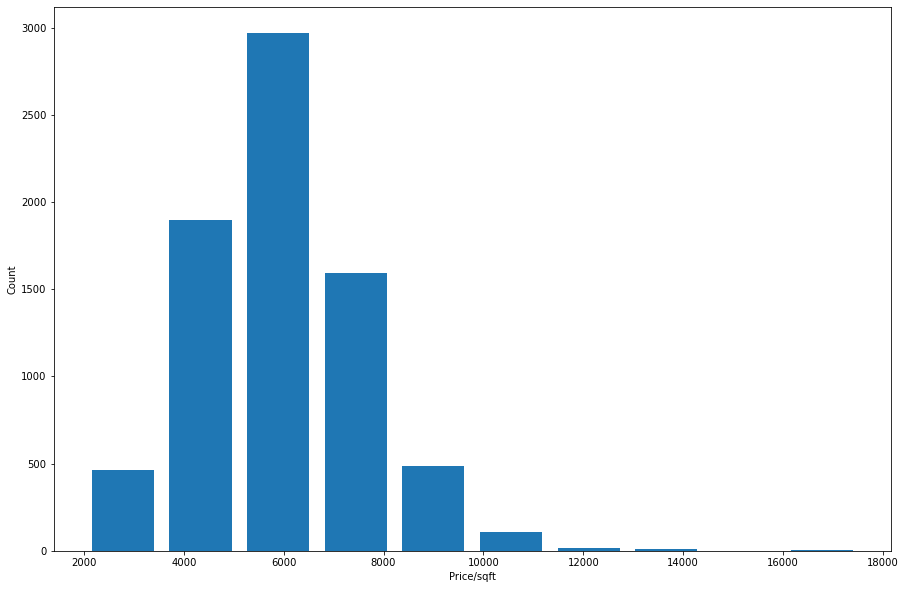

In [49]:
plt.hist(df8.price_per_sqft,rwidth=0.8)
plt.xlabel('Price/sqft')
plt.ylabel('Count')

In [50]:
df8[df8.bath>10]

,total_sqft,bath,price,site_location,BHK,price_per_sqft
1211,6000.0,12.0,150.0,Bibvewadi,11,2500.000000
2637,12000.0,12.0,525.0,Fatima Nagar,10,4375.000000
5265,5425.0,13.0,275.0,Kondhwa Khurd,13,5069.124424
6350,10000.0,16.0,550.0,Model colony,16,5500.000000
10389,4000.0,12.0,160.0,Wagholi,10,4000.000000


Text(0, 0.5, 'Count')

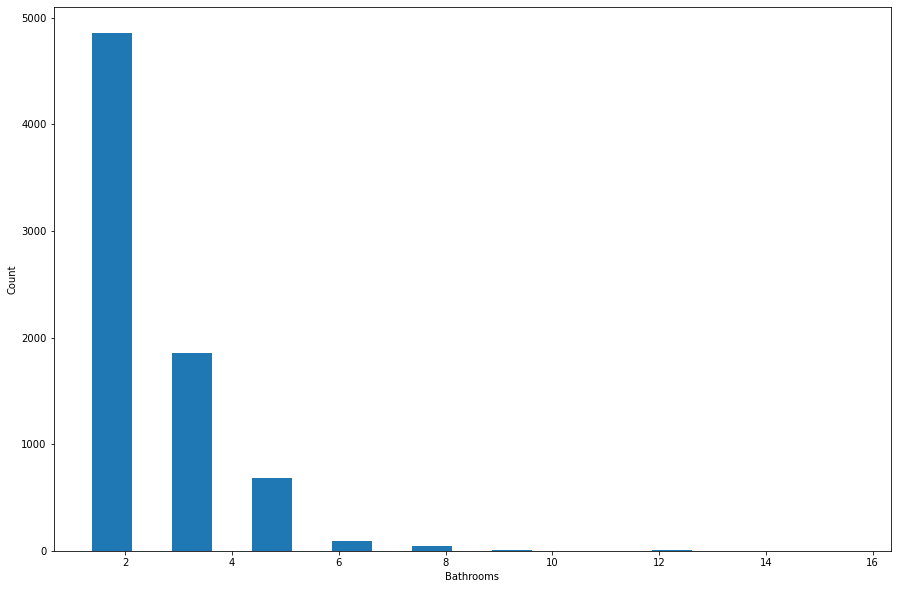

In [51]:
plt.hist(df8.bath,rwidth=0.5)
plt.xlabel('Bathrooms')
plt.ylabel('Count')

In [52]:
df8[df8.bath>df8.BHK+2]

,total_sqft,bath,price,site_location,BHK,price_per_sqft
772,1806.0,6.0,116.0,Baner,3,6423.034330
3067,11338.0,9.0,1000.0,Ghorpade Peth,6,8819.897689
4231,7000.0,8.0,450.0,Karve Nagar,4,6428.571429


In [53]:
df9=df8[df8.bath<df8.BHK+2]
df9.shape

(7479, 6)

In [54]:
df10 = df9.drop(['price_per_sqft'],axis=1)
df10.head()

,total_sqft,bath,price,site_location,BHK
0,1056.0,2.0,39.07,Alandi Road,2
1,2894.0,4.0,245.00,Alandi Road,4
2,1084.0,2.0,50.00,Alandi Road,2
3,1230.0,2.0,80.00,Alandi Road,2
4,1750.0,3.0,130.00,Alandi Road,3


In [55]:
dummies=pd.get_dummies(df10.site_location)
dummies.head()

,Alandi Road,Ambegaon Budruk,Anandnagar,Aundh,Aundh Road,Balaji Nagar,Baner,Baner road,Bhandarkar Road,Bhavani Peth,...,Uruli Devachi,Vadgaon Budruk,Viman Nagar,Vishrant Wadi,Wadgaon Sheri,Wagholi,Wakadewadi,Wanowrie,Warje,Yerawada
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [56]:
df11 = pd.concat([df10.drop(['site_location'],axis=1),dummies.drop(['Yerawada'],axis=1)],axis=1)
df11.head()

,total_sqft,bath,price,BHK,Alandi Road,Ambegaon Budruk,Anandnagar,Aundh,Aundh Road,Balaji Nagar,...,Tilak Road,Uruli Devachi,Vadgaon Budruk,Viman Nagar,Vishrant Wadi,Wadgaon Sheri,Wagholi,Wakadewadi,Wanowrie,Warje
0,1056.0,2.0,39.07,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2894.0,4.0,245.00,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1084.0,2.0,50.00,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1230.0,2.0,80.00,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1750.0,3.0,130.00,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [57]:
df11.shape

(7479, 99)

In [58]:
x=df11.drop(['price'],axis=1)
y=df11.price

In [59]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=10)

In [60]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

In [61]:
lr.fit(x_train,y_train)
lr.score(x_test,y_test)

0.8234642712561874

In [62]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv=ShuffleSplit(n_splits=5,test_size=0.2,random_state=0)
cross_val_score(LinearRegression(),x,y,cv=cv)

array([0.87729294, 0.87158074, 0.82825079, 0.89763339, 0.81068616])

In [63]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor

In [64]:
def model_param(x,y):
    algos={
            'linear_regression':{
                'model':LinearRegression(),
                'params':{
                    'normalize':[True,False]
                }
            },
            'lasso':{
                'model':Lasso(),
                'params':{
                    'alpha':[1,2],
                    'selection':['random','cyclic']
                }
            },
    
            
            'decision_tree':{
                'model':DecisionTreeRegressor(max_depth=None),
                'params':{
                    'criterion':['mse','friedman_mse'],
                    'splitter':['best','random']

                }
            }

        }

    scores=[]
    cv=ShuffleSplit(n_splits=5,test_size=0.2,random_state=0)
    for algo_name,config in algos.items():
        gcv=GridSearchCV(config['model'],config['params'],cv=cv,return_train_score=False)
        gcv.fit(x,y)
        scores.append({
            'model':algo_name,
            'best_score':gcv.best_score_,
            'best_param':gcv.best_params_
        })
    return pd.DataFrame(scores,columns=['model','best_score','best_param'])

model_param(x,y)

/Users/rohanwaghmare/miniforge3/envs/mlp/lib/python3.8/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(
/Users/rohanwaghmare/miniforge3/envs/mlp/lib/python3.8/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:


/Users/rohanwaghmare/miniforge3/envs/mlp/lib/python3.8/site-packages/sklearn/tree/_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
/Users/rohanwaghmare/miniforge3/envs/mlp/lib/python3.8/site-packages/sklearn/tree/_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(


,model,best_score,best_param
0,linear_regression,0.857089,{'normalize': False}
1,lasso,0.857851,"{'alpha': 2, 'selection': 'random'}"
2,decision_tree,0.777850,"{'criterion': 'mse', 'splitter': 'random'}"


In [65]:
def predict_price(location,sqft,bath,bhk):
    loc_index=np.where(x.columns==location)[0][0]
    
    k=np.zeros(len(x.columns))
    k[0]=sqft
    k[1]=bath
    k[2]=bhk
    if loc_index>=0:
        k[loc_index]=1
    return lr.predict([k])[0]*100000

In [66]:
predict_price('Pune Railway Station',2000,2,2)

/Users/rohanwaghmare/miniforge3/envs/mlp/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


12957302.782596752

In [67]:
predict_price('Uruli Devachi',2000,2,2)


/Users/rohanwaghmare/miniforge3/envs/mlp/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


13433304.237374483

In [68]:
predict_price('Camp',2000,2,2)


/Users/rohanwaghmare/miniforge3/envs/mlp/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


12332170.26063704

In [76]:
predict_price('Hadapsar Industrial Estate',2500,3,2)

/Users/rohanwaghmare/miniforge3/envs/mlp/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


17044473.402823694

In [70]:
x.columns

Index(['total_sqft', 'bath', 'BHK', 'Alandi Road', 'Ambegaon Budruk',
       'Anandnagar', 'Aundh', 'Aundh Road', 'Balaji Nagar', 'Baner',
       'Baner road', 'Bhandarkar Road', 'Bhavani Peth', 'Bibvewadi', 'Bopodi',
       'Budhwar Peth', 'Bund Garden Road', 'Camp', 'Chandan Nagar', 'Dapodi',
       'Deccan Gymkhana', 'Dehu Road', 'Dhankawadi', 'Dhayari Phata',
       'Dhole Patil Road', 'Erandwane', 'Fatima Nagar',
       'Fergusson College Road', 'Ganesh Peth', 'Ganeshkhind', 'Ghorpade Peth',
       'Ghorpadi', 'Gokhale Nagar', 'Gultekdi', 'Guruwar peth', 'Hadapsar',
       'Hadapsar Industrial Estate', 'Hingne Khurd', 'Jangali Maharaj Road',
       'Kalyani Nagar', 'Karve Nagar', 'Karve Road', 'Kasba Peth', 'Katraj',
       'Khadaki', 'Khadki', 'Kharadi', 'Kondhwa', 'Kondhwa Budruk',
       'Kondhwa Khurd', 'Koregaon Park', 'Kothrud', 'Law College Road',
       'Laxmi Road', 'Lulla Nagar', 'Mahatma Gandhi Road', 'Mangalwar peth',
       'Manik Bagh', 'Market yard', 'Model colony',

In [71]:
import pickle
with open('pune_home_prices_model.pickle','wb') as f:
    pickle.dump(lr,f)

In [72]:
import json
columns={
    'data_columns': [col.lower() for col in x.columns]
}
with open('columns.json','w') as f:
    f.write(json.dumps(columns))